In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report as rep,confusion_matrix as cm

data=pd.read_csv("/datasets_56485_108594_Breast_cancer_data.csv")

In [ ]:
data.head()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
data.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [ ]:
data.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


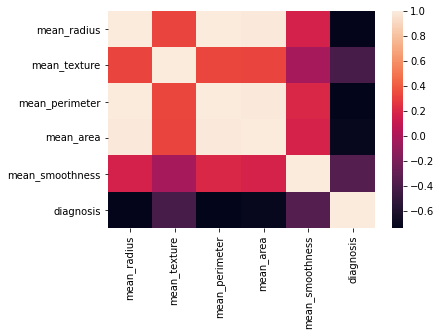

In [ ]:
sns.heatmap(data.corr())


In [ ]:
#Select independent and dependent variables
y= data['diagnosis']
x=data.drop(columns=['diagnosis'])

In [ ]:
# perform normalisation in indeoendent variables
from sklearn.preprocessing import StandardScaler
scale =StandardScaler()
Xnorm=scale.fit_transform(x)
print(" normalised data using standarisation ", Xnorm)

 normalised data using standarisation  [[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633]
 [ 1.82982061 -0.35363241  1.68595471  1.90870825 -0.82696245]
 [ 1.57988811  0.45618695  1.56650313  1.55888363  0.94221044]
 ...
 [ 0.70228425  2.0455738   0.67267578  0.57795264 -0.84048388]
 [ 1.83834103  2.33645719  1.98252415  1.73521799  1.52576706]
 [-1.80840125  1.22179204 -1.81438851 -1.34778924 -3.11208479]]


In [ ]:
#Splitting the variables into into test and training sets
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(Xnorm,y,test_size = 0.1,random_state=0)

In [ ]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression

classifier_lr = LinearRegression()
classifier_lr.fit(x_train,y_train)
y_lr_pred = classifier_lr.predict(x_test)

#Result

classifier_lr.score(x_test,y_test)*100

64.81351846907462

In [ ]:
#Logistic Regression Model

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression() 
log_model.fit(x_train, y_train) 
y_pred_log = log_model.predict(x_test) 
   
  
log_model.score(x_test, y_pred_log)*100

100.0

In [ ]:
# XG Boost
from xgboost import XGBClassifier
xgboost_model = XGBClassifier()
xgboost_model.fit(x_train, y_train)
y_pred_xg = xgboost_model.predict(x_test)

xgboost_model.score(x_test , y_pred_xg)*100

100.0

In [ ]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)

gb_model.score(x_test , y_pred_gb)*100

100.0

In [ ]:
#Naive Bayes Classification

from sklearn.naive_bayes import GaussianNB
classifier_naive = GaussianNB()
classifier_naive.fit(x_train, y_train)
y_naive_pred = classifier_naive.predict(x_test)

#Accuracy

classifier_naive.score(x_test,y_test)*100


91.22807017543859

In [ ]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

classifier_rfc = RandomForestClassifier(n_estimators=20, random_state=0)
classifier_rfc.fit(x_train, y_train)
y_rfc_pred = classifier_rfc.predict(x_test)

#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_rfc_pred)*100

92.98245614035088

In [ ]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier()
classifier_dtc.fit(x_train,y_train)
y_dtc_pred = classifier_dtc.predict(x_test)

#accuracy
accuracy_score(y_test,y_dtc_pred)*100


84.21052631578947

In [ ]:
#Simple Support Vector Classification

from sklearn.svm import SVC

classifier_svm = SVC()
classifier_svm.fit(x_train, y_train)
y_svm_pred = classifier_svm.predict(x_test)

#Accuracy
classifier_svm.score(x_test,y_test) *100

91.22807017543859

In [ ]:
#Kernel Support Vector Classification

from sklearn.svm import SVC

classifier_svc = SVC(kernel='linear',random_state=0)
classifier_svc.fit(x_train,y_train)
y_svc_pred = classifier_svc.predict(x_test)

#accuracy
classifier_svc.score(x_test,y_test)*100

92.98245614035088

In [ ]:
#Stochastic Gradient Descent Classifier

from sklearn.linear_model import SGDClassifier

classifier_sgd= SGDClassifier(loss='modified_huber',shuffle=True,random_state=0)
classifier_sgd.fit(x_train,y_train)
y_sgd_pred = classifier_sgd.predict(x_test)

#accuracy
accuracy_score(y_test,y_sgd_pred)*100

89.47368421052632

In [ ]:
#Results of the classifications

con_log = cm(y_test,y_pred_log)
con_xg = cm(y_test,y_pred_xg)
con_gb = cm(y_test,y_pred_gb)
con_naive = cm(y_test,y_naive_pred)
con_rfc = cm(y_test,y_rfc_pred)
con_dtc = cm(y_test,y_dtc_pred)
con_svm = cm(y_test,y_svm_pred)
con_svc = cm(y_test,y_svc_pred)
con_sgd = cm(y_test,y_sgd_pred)


print("LOGISTIC REGRESSION MODEL\n",rep(y_test,y_pred_log),"\n", con_log ,"\n")
print("XG BOOST\n",rep(y_test,y_pred_xg),"\n", con_xg ,"\n")
print("GRADIENT BOOSTING CLASSIFIER\n",rep(y_test,y_pred_gb),"\n", con_gb ,"\n")
print("NAIVE BAYES RESULTS\n",rep(y_test,y_naive_pred),"\n", con_naive ,"\n")
print("RANDOM FOREST CLASSIFIER RESULTS\n",rep(y_test,y_rfc_pred),"\n" , con_rfc, "\n")
print("DECISION TREE RESULTS\n",rep(y_test,y_dtc_pred),"\n" , con_dtc , "\n")
print("SIMPLE SUPPORT VECTOR CLASSIFICATION\n",rep(y_test,y_svm_pred),"\n", con_svm , "\n")
print("KERNEL SUPPORT VECTOR CLASSIFICATION\n",rep(y_test,y_svc_pred),"\n", con_svc , "\n")
print("STOCHASTIC GRADIENT DESCENT RESULTS\n",rep(y_test,y_sgd_pred),"\n", con_sgd , "\n")

LOGISTIC REGRESSION MODEL
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.97      0.94      0.96        35

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57
 
 [[21  1]
 [ 2 33]] 

XG BOOST
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.94      0.97      0.96        35

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57
 
 [[20  2]
 [ 1 34]] 

GRADIENT BOOSTING CLASSIFIER
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.92      0.94      0.93        35

    accuracy                           0.91        57
   macro avg   

In [ ]:
predicted_class= classifier_svc.predict(x)
data['Predicted diagnosis']= predicted_class
data[['diagnosis','Predicted diagnosis']]

,diagnosis,Predicted diagnosis
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
564,0,0
565,0,0
566,0,0
567,0,0
